<a href="https://colab.research.google.com/github/AlbertoGhub/Projects/blob/main/ALBERTO_Proyecto_M7_T%C3%A9cnicas_avanzadas_para_ciencia_de_datos_y_empleabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti. 

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**. 

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

## 1. Selecting the dataframe: ***Demographics of Academy Awards (Oscars) Winners.***   

### Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### Models to test:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
# Connecting to the DRIVE:
drive.mount("/content/drive")

Mounted at /content/drive


## 2. You must do an exploratory analysis and data cleaning. Use the techniques you find convenient.

### Importing the dataset:

In [ ]:
df_original = pd.read_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Proyecto_M7/Data/Oscars-demographics-DFE.csv", encoding = "latin1") # Else where with google Colab
# df_original = pd.read_csv(r"C:\Users\AAvendano\Downloads\PY\ML\M7\Data\Oscars-demographics-DFE.csv", encoding = "latin1") # When I work in the office with Jupyter
# df_original = pd.read_csv(r"D:\Documents\Projects\DataScience_Projects\M7\Data\Oscars-demographics-DFE.csv", encoding = "latin1") 

### Checking the dataframe:

In [ ]:
df_original.loc[:5]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN
5,670454358,False,finalized,3,2/10/15 3:50,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,Cavalcade,Frank Lloyd,NaN,NaN,NaN,NaN


### The rules: We will get rid of the columns that have above 20% of missing data. Checking the shape:

In [ ]:
df_original.shape

(441, 27)

In [ ]:
len(df_original.columns)

27

In [ ]:
df_original.dtypes

_unit_id                           int64
_golden                             bool
_unit_state                       object
_trusted_judgments                 int64
_last_judgment_at                 object
birthplace                        object
birthplace:confidence            float64
date_of_birth                     object
date_of_birth:confidence         float64
race_ethnicity                    object
race_ethnicity:confidence        float64
religion                          object
religion:confidence              float64
sexual_orientation                object
sexual_orientation:confidence    float64
year_of_award                      int64
year_of_award:confidence         float64
award                             object
biourl                            object
birthplace_gold                   object
date_of_birth_gold                object
movie                             object
person                            object
race_ethnicity_gold               object
religion_gold   

### Checking the NaNs:

In [ ]:
df_original.isna().sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                 25
birthplace                         0
birthplace:confidence              0
date_of_birth                      0
date_of_birth:confidence           0
race_ethnicity                     0
race_ethnicity:confidence          0
religion                           0
religion:confidence                0
sexual_orientation                 0
sexual_orientation:confidence      0
year_of_award                      0
year_of_award:confidence           0
award                              0
biourl                             0
birthplace_gold                  432
date_of_birth_gold               433
movie                              0
person                             0
race_ethnicity_gold              439
religion_gold                    431
sexual_orientation_gold          438
year_of_award_gold               430
d

### With this one, it is even clearer what columns to drop. There are a couple of them that have around 80% of missing data, that won't help us in our model. Let's see them in percentages so we can see them in percentages:

    1. Getting data
    2. Checking the longest key
    3. To add a separator
    4. In the for cycle, we will just check the difference between the longest and length.  
    5. Checking the difference between the longest and the current value in the for
    6. Multiply the difference by the spaces
    7. Putting it all together
    
### Chekcing them in terms of percentages: PERCENTAGE OF NaS:

In [ ]:
# 1. Getting data:
percentages = dict(((df_original.isna().sum())*100)/len(df_original))

# 2. Checking the longest key:
longest_key = max(percentages, key=len)

# 3. To add a separator:
separator = "--------------------------------------"

# 4. In the for cycle, we will just check the difference between the longest and length:  
for key, value in percentages.items():
    # 5. Checking the difference between the longest and the current value in the for:
    difference = len(longest_key) - len(key) 
    
    # 6. Multiply the difference by the spaces:
    space = " "*difference
    
    # 7. Putting it all together:
    print(f"{key} {space} {separator} {np.around(value, 2)} %")

_unit_id                       -------------------------------------- 0.0 %
_golden                        -------------------------------------- 0.0 %
_unit_state                    -------------------------------------- 0.0 %
_trusted_judgments             -------------------------------------- 0.0 %
_last_judgment_at              -------------------------------------- 5.67 %
birthplace                     -------------------------------------- 0.0 %
birthplace:confidence          -------------------------------------- 0.0 %
date_of_birth                  -------------------------------------- 0.0 %
date_of_birth:confidence       -------------------------------------- 0.0 %
race_ethnicity                 -------------------------------------- 0.0 %
race_ethnicity:confidence      -------------------------------------- 0.0 %
religion                       -------------------------------------- 0.0 %
religion:confidence            -------------------------------------- 0.0 %
sexual_orie

We can exclude all the columns indicating Values above 90%, as we can see from the information above. We'll see that a dropna won't work with this kind of data, so we can deal with the reports of just 5% later on.

In [ ]:
df = df_original.loc[:, ((df_original.isna().sum())*100)/len(df_original) < 20]

# Checking again the data frame, we have:
df.isna().sum()

_unit_id                          0
_golden                           0
_unit_state                       0
_trusted_judgments                0
_last_judgment_at                25
birthplace                        0
birthplace:confidence             0
date_of_birth                     0
date_of_birth:confidence          0
race_ethnicity                    0
race_ethnicity:confidence         0
religion                          0
religion:confidence               0
sexual_orientation                0
sexual_orientation:confidence     0
year_of_award                     0
year_of_award:confidence          0
award                             0
biourl                            0
movie                             0
person                            0
dtype: int64

### As we can see here, we only have now the one of 5% (25 in the "_last_judgment_at"). Since this is a column that won't add much value to our predictions, we can just drop it. We will do that down the road. For now, we can leave the data set as it is.

### On the other hand,we can check if there's any duplicate row in our already cleaned dataframe. It's very important for you to remove duplicates from the dataset to maintain accuracy and to avoid misleading statistics so we are going to double check it. 

In [ ]:
# Checking duplicates:
print(f"Fortunately, we have {df.duplicated().sum()} in our dataframe, so we can carry on.")

Fortunately, we have 0 in our dataframe, so we can carry on.


### Analyzing the dataframe, now without Nas or duplicates values, we are going to make our data clearer. Therefore, we need to determine which column will stay and which will be deleted in order to make tune our future model a bit more. On the other hand, we also need to determine which is our target variable, which is the one that we are going to use to make predictions.


### In this case, the objective is to determine if the golden globe is given or not. This shows us a clear classification problem whose TARGET variable is going to be "_golden" column (false or true). That would cover the first part of the mission. The second part is to pinpoint the variables that will not be adding anything valuable to our prediction. Let's check the meaning of each row and mark them as we go through them so we can proceed with the delation afterwards:

    1. _unit_id* - Candidate's ID
    2. _golden -  Target variable: True or False (if it won the Golden or not)
    3. _unit_state* - Finilized or not (since the 1928 up until now)
    4. _trusted_judgments - How many votes
    5. _last_judgment_at* - Last time it was voted
    6. birthplace
    7. birthplace:confidence*
    8. date_of_birth*
    9. date_of_birth:confidence*
    10. race_ethnicity
    11. race_ethnicity:confidence*
    12. religion
    13. religion:confidence*
    14. sexual_orientation
    15. sexual_orientation:confidence*
    16. year_of_award
    17. year_of_award:confidence*
    18. award - Best Actress, Best Director, Best Actor, Best Supporting Actress, Best Supporting Actor
    19. biourl*
    20. movie
    21. person - Actor/Actrees' name
    
### The ones with the "*" are the ones that we can delete. They are not representing anything too important for us to get our prediction right. This is the entire list:

    1. _unit_id
    2. _unit_state
    3. _last_judgment_at
    4. birthplace:confidence
    5. date_of_birth:confidence
    6. race_ethnicity:confidence
    7. religion:confidence
    8. sexual_orientation:confidence
    9. year_of_award:confidence
    10. date_of_birth
    11. _last_judgment_at (the 5% of Nas)
    
### Getting them into a list, so we can proceed easily with the delation:

In [ ]:
to_delete = ["_unit_id", "_unit_state", "_last_judgment_at", 
 "birthplace:confidence","date_of_birth:confidence", 
 "race_ethnicity:confidence", "religion:confidence", 
 "sexual_orientation:confidence", "year_of_award:confidence", "biourl", "date_of_birth", "_last_judgment_at"]

### Now, removing the columns:

In [ ]:
df = df.drop(columns=to_delete)
df.isna().sum()

_golden               0
_trusted_judgments    0
birthplace            0
race_ethnicity        0
religion              0
sexual_orientation    0
year_of_award         0
award                 0
movie                 0
person                0
dtype: int64

### Now, we have dropped all the Nas and columns that won't add value to our predictions. Data frame cleaned, mission accomplished :). Now, that the data frame is neat, we can make it clearer by renaming the column's name. Column names:

    1. '_golden' - Target_golden
    2. '_trusted_judgments' - "Trusted_judgments"
    3. 'birthplace' - "Birthplace"
    4. 'race_ethnicity' - "Race_ethnicity"
    5. 'religion' - "Religion"
    6. 'sexual_orientation' - "Sexual_orientation"
    7. 'year_of_award' - "Year_of_award"
    8. 'award' - "Award"
    9. 'movie' - "Movie"
    10. 'person' - "Actor/Actress_name"
    
### Step to change name:

    1. Getting the name into a diccionary, adding the old and the new one.
    2. Changing the name.
    3. Check the data frame

In [ ]:
# 1. Getting the name into a diccionary, adding the old and the new one.  
names = {'_golden' : "Target_golden",
'_trusted_judgments' : "Trusted_judgments",
'birthplace' : "Birthplace",
'race_ethnicity' : "Race_ethnicity",
'religion' : "Religion",
'sexual_orientation' : "Sexual_orientation",
'year_of_award' : "Year_of_award" ,
'award' : "Award",
'movie' : "Movie", 
'person' : "Actor/Actress_name"}

# 2. Changing the name:
df = df.rename(columns= names)

# 3. Checking the data frame again:
df.loc[:5]

,Target_golden,Trusted_judgments,Birthplace,Race_ethnicity,Religion,Sexual_orientation,Year_of_award,Award,Movie,Actor/Actress_name
0,False,3,"Chisinau, Moldova",White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,False,3,"Glasgow, Scotland",White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,False,3,"Chisinau, Moldova",White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,False,3,"Chicago, Il",White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,False,3,"Salt Lake City, Ut",White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
5,False,3,"Glasgow, Scotland",White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd


## Visualizing the nominations to have a better understanding of to whom the accolade would be given.

#### Graph settings the plot (could be a hist or a bar chart):

    1. Transforming the data from the specific to a dictionary to be able to take X and y.
    2. Getting X and y (for both).
    3. Creating the graph (subplot to create multiple grapsh in one grid).
    4. Setting the main title.
    5. Creating the individual graphs to put it in the subplots.
        5.1. Adding the information on top of each bar.
        5.2. Setting the X ticks (ticks, labels, rotation, horizontal alignement, fontzise).
        5.3. Setting the y label.
    

In [ ]:
def bar_graph(datos, title, color_graph_1, color_graph_2):

  # 3. Getting X and y
  X1_axis = list(datos.keys()) 
  y1_axis = list(datos.values()) 
  
  # Getting y for the second graph
  y2_axis = [np.around((element/len(df))*100, 2) for element in y1_axis]

  # 4. Creating the graph (subplot to create multiple grapsh in one grid)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

  # 5. Main title
  fig.suptitle(title, fontsize = 20)

  # //////////////////////// First plot ////////////////////////////////////

  # creating the plot 
  bar1 = ax1.bar(X1_axis, y1_axis, color = color_graph_1)

  # Adding the information on top of each bar
  ax1.bar_label(bar1, labels=y1_axis, label_type="edge")

  # Setting the X ticks
  ax1.set_xticks(np.arange(len(X1_axis)), X1_axis, rotation = 30, ha = "right", fontsize = 12)

  # Setting the y label
  ax1.set_ylabel("Number of nominations", fontsize = 15)

  # //////////////////////// Second plot ////////////////////////////////////

  # creating the plot 
  bar2 = ax2.bar(X1_axis, y2_axis, color = color_graph_2)

  # Adding the information on top of each bar (first graph)
  ax2.bar_label(bar2, labels=y2_axis, label_type="edge")

  # Setting the X ticks
  ax2.set_xticks(np.arange(len(X1_axis)), X1_axis, rotation = 30, ha = "right", fontsize = 12);

  # Setting the y label
  ax2.set_ylabel("Percentage (%)", fontsize = 15);  
  
  
  # End of functino

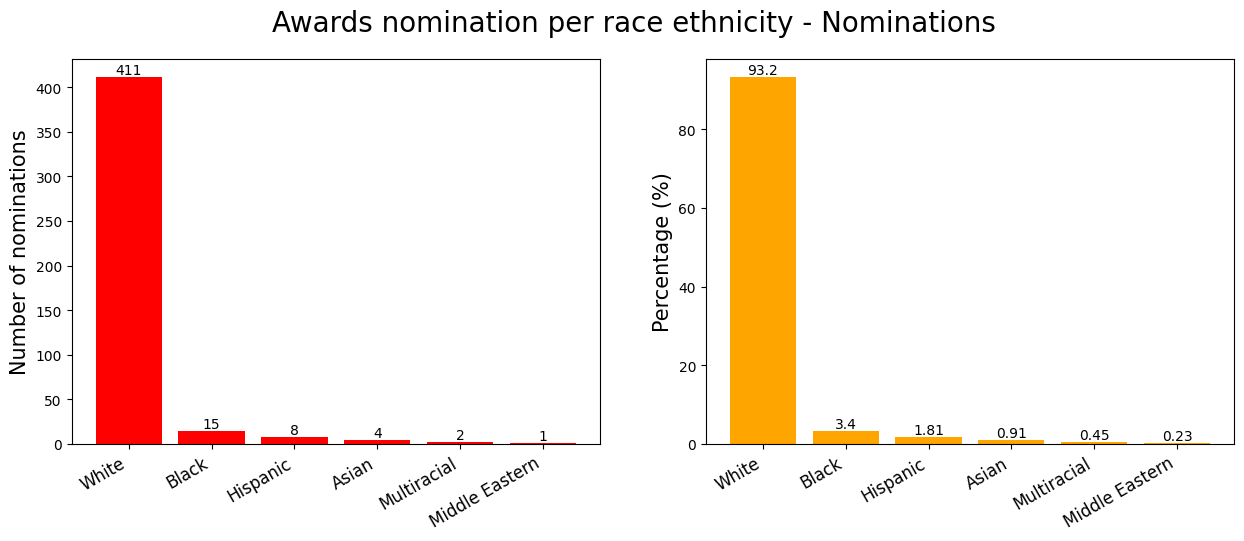

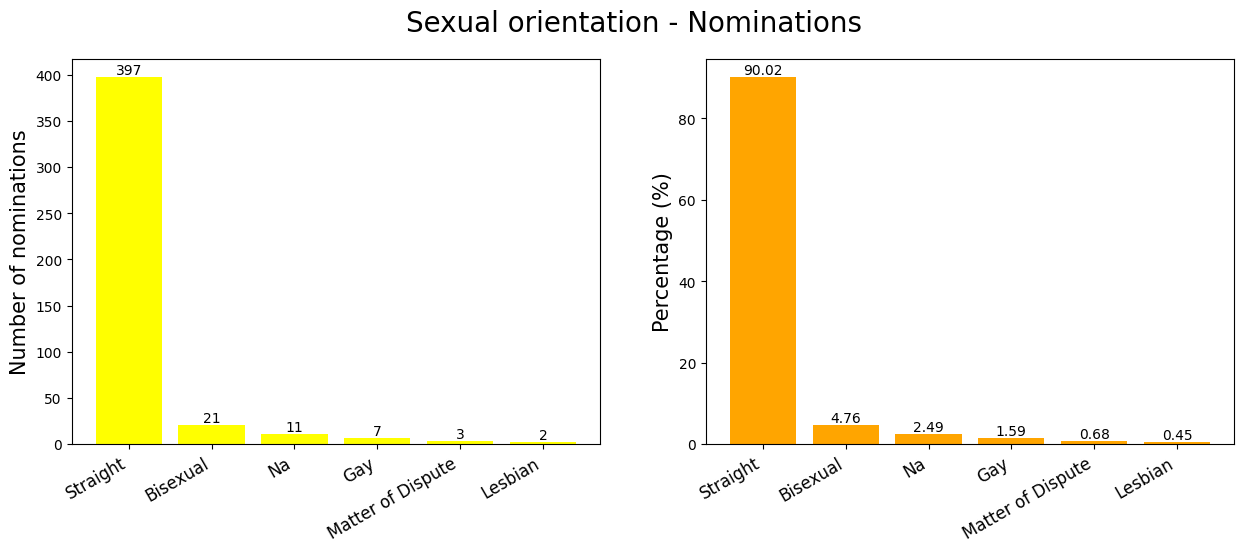

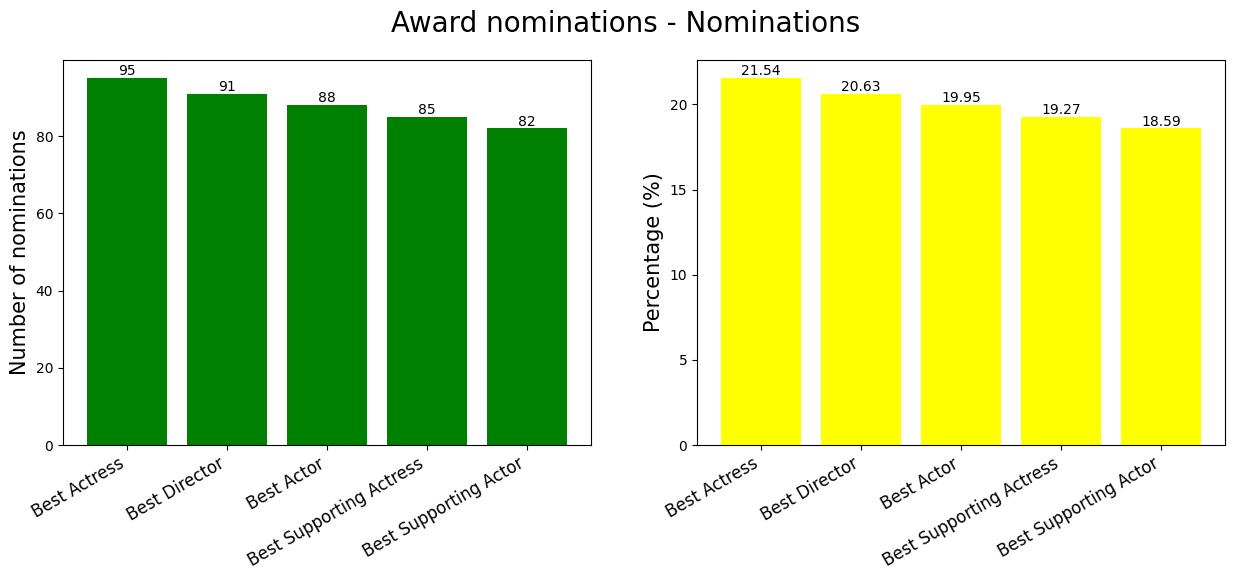

In [ ]:
# Let's check the graphs:

# 2. Transforming the data from the specific to a dictionary to be able to take X and y

# Race:

Race_ethnicity = dict(df["Race_ethnicity"].value_counts())
# Graph
bar_graph(Race_ethnicity, "Awards nomination per race ethnicity - Nominations", "red", "orange")

# Religion
Sexual_orientation = dict(df["Sexual_orientation"].value_counts())
# Graph
bar_graph(Sexual_orientation, "Sexual orientation - Nominations", "yellow", "orange")

# Award
Award = dict(df["Award"].value_counts())
# Graph
bar_graph(Award, "Award nominations - Nominations", "green", "yellow")

### Since we have categorical data, we will use encode library to make it numerical, thus, training the model:

    1. Check for the colomns that are categorical.
    2. Getting those columns into a list.
    3. Creating the encoding object.
    4. Applying it directly into the DF.

In [ ]:
# 1. Check for the ones colomns that are not numbers.
df.dtypes

Target_golden           bool
Trusted_judgments      int64
Birthplace            object
Race_ethnicity        object
Religion              object
Sexual_orientation    object
Year_of_award          int64
Award                 object
Movie                 object
Actor/Actress_name    object
dtype: object

In [ ]:
# Getting the columns to encode:
to_encode = df.select_dtypes(exclude="int64")
to_encode.dtypes

Target_golden           bool
Birthplace            object
Race_ethnicity        object
Religion              object
Sexual_orientation    object
Award                 object
Movie                 object
Actor/Actress_name    object
dtype: object

In [ ]:
# 3. Creating the encoding object.
ordinal = OrdinalEncoder()

# 4. Applying it directly into the DF.
df[list(to_encode.columns)] = ordinal.fit_transform(df[list(to_encode.columns)])

df.head()

,Target_golden,Trusted_judgments,Birthplace,Race_ethnicity,Religion,Sexual_orientation,Year_of_award,Award,Movie,Actor/Actress_name
0,0.0,3,30.0,5.0,15.0,5.0,1927,2.0,320.0,209.0
1,0.0,3,60.0,5.0,15.0,5.0,1930,2.0,245.0,93.0
2,0.0,3,30.0,5.0,15.0,5.0,1931,2.0,21.0,209.0
3,0.0,3,28.0,5.0,15.0,5.0,1932,2.0,212.0,257.0
4,0.0,3,171.0,5.0,19.0,5.0,1933,2.0,34.0,91.0


### Now that all our data is numerical, we can train our model :).

## 3. Train the Machine Learning, natural language processing, or neural network model you deem appropriate.

    1. Splitting the cleaned data (X, y, train and test).
    2. Standarization: Checking if the distribution is normal with the histograma. If it is alike to a normal distribution, we can use StandarScaler, if not, MinMaxScaler
    3. Confusion Matrix
    4. Defining the model we are going to use (dictionary). We can see all the classification model in the library section: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
    5. Evaluating the model using Cross validation process to determine what classification model would perform the best.
    6. Choosing the best performing model.
    7. Training the best perfroming model.
    8. Evaluate the model on a held-out test set.
    
### 1. Splitting the cleaned data (X, y, train and test).

In [ ]:
# Getting X and y:
X = df.drop(["Target_golden"], axis = 1)
y = df["Target_golden"]

# Getting the training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  2. Standardization: Checking if the distribution is normal with the histogram. If it is alike to a normal distribution, we can use StandarScaler, if not, MinMaxScaler.

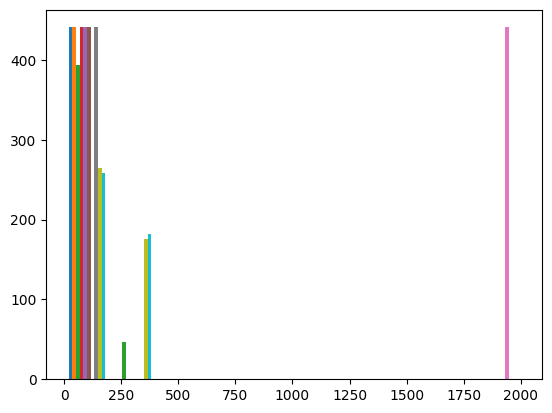

In [ ]:
plt.hist(df);

### This doesn't look like a normal distribution so we can go for MinMaxScaler().

### We want to do the scaler on the training data only, and not on the test since we can spect altered results if we don't do it. 

In [ ]:
# Creating the object:
scaler = MinMaxScaler()

# Only scaling the traning so we won't alter the results on our model
X_train = scaler.fit_transform(X_train) # Scaling and fitting (applying)
X_test = scaler.transform(X_test) 

### Now, we the normilized data, we can check the data in the correlation matrix, just to see how the features are correlating to the target variable:

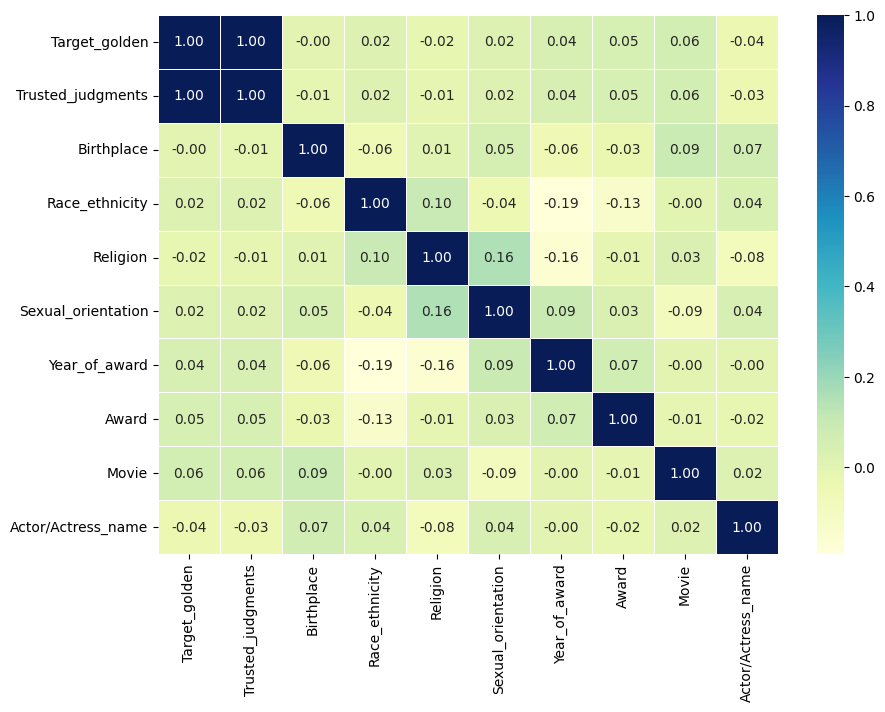

In [ ]:
fig, ax = plt.subplots(figsize=(10,7)) 
ax = sns.heatmap(df.corr(), annot = True, linewidths = 0.5,  fmt = ".2f",  cmap = "YlGnBu"); 

### 4. Defining the model we are going to use (dictionary). We are going to use:

    1. Logistic Regression
    2. Naive Bayes 
    3. K-Nearest Neighbors 
    4. Decision Tree 
    5. Support Vector Machines
    6. RandomForestClassifier

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "Naive Bayes": GaussianNB(), 
          "K-Nearest Neighbors": KNeighborsClassifier(), 
          "Decision Tree": DecisionTreeClassifier(), 
          "Support Vector Machines": SVC(), 
          "RandomForestClassifier": RandomForestClassifier()}

### 5. Evaluating the model using Cross validation.

In [ ]:
print("The followings are the score per each model:\n\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean()*100:.3f}% with a standard deviation of (±{scores.std():.3f})")
    # End of for

The followings are the score per each model:


Logistic Regression: 99.429% with a standard deviation of (±0.007)
Naive Bayes: 100.000% with a standard deviation of (±0.000)
K-Nearest Neighbors: 99.718% with a standard deviation of (±0.006)
Decision Tree: 100.000% with a standard deviation of (±0.000)
Support Vector Machines: 99.437% with a standard deviation of (±0.011)
RandomForestClassifier: 100.000% with a standard deviation of (±0.000)


As we can see here, we got a good accuracy with a couple of models. I will just leave out the ones that provided a 100% since it seems the model is overfit. In this case, I will go for the one that offer the higher accuracy which is k-nearest Neighbors.

### 6. Choosing the best performing model (K-Nearest Neighbors).

In [ ]:
# Creating a list of k values to see which one offers a better accuracy, just setting k values

k_values = [i for i in range (1,31)]
scores = []

# Evaluating the model with different k values
for k in k_values:
    # Creating the model with a k value variable  
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Storing the scores and using cross-validation again
    score = cross_val_score(knn, X_train, y_train, cv=5)
    
    # Showing the answer
    # print(f"For a k value of {k}, we got an accuracy of {np.around(np.mean(score)*100, 2)}%")
    
    scores.append(np.mean(score))
    # End of for

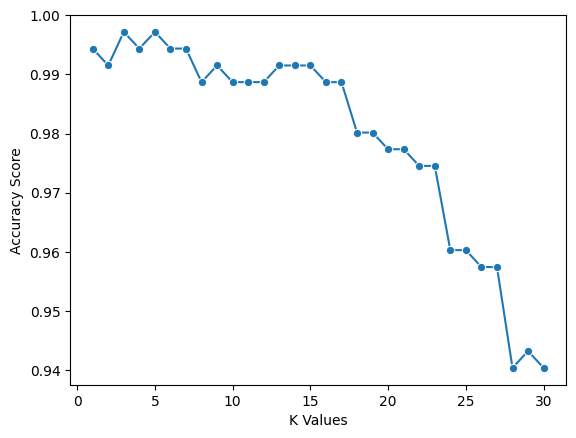

In [ ]:
# Plotting what we got
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values");
plt.ylabel("Accuracy Score");

We can see that the model is super accurate and with a k value of 1, where we could reach 98%. As we are increasing our k value, the accuracy is decreasing. 

### 7. Training the best perfroming model.

In [ ]:
# Setting up the model with the k-value of 1

# Getting the index where the higher value is placed
best_index = np.argmax(scores) 

# Now, selecting the ACTUAL value
best_k = k_values[best_index]

# Training the model with the best value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 8. Evaluate the model on a held-out test set.

In [ ]:
# Checking the accuracy:

# Predicting
y_pred = knn.predict(X_test)

# Showing the values
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        85
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89

